# A simple program for simulating a Stocashtic Differential Equation

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Defining Parameters for our SDE model

In [12]:
sigma = 1.  # Standard deviation.
mu = 10.  # Mean/ Drift Coefficient
tau = .05  # Time constant.

Define few Simulation Variables

In [13]:
dt = 0.001  # Time step.
T = 1.  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.

Renormalized variables

In [14]:
sigma_bis = sigma * np.sqrt(2. / tau)
sqrtdt = np.sqrt(dt)

Creating a vector that will contain all successive values of our process during the simulation

In [15]:
x = np.zeros(n)

Simulating the SDE using Euler-Maruyama Method.

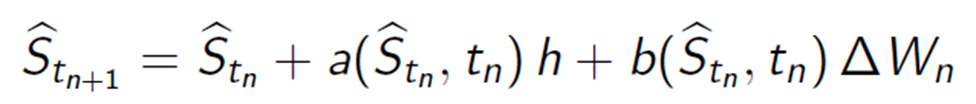

In [16]:
for i in range(n - 1):
    x[i + 1] = x[i] + dt * (-(x[i] - mu) / tau) + sigma_bis * sqrtdt * np.random.randn()
    

Displaying the SDE:

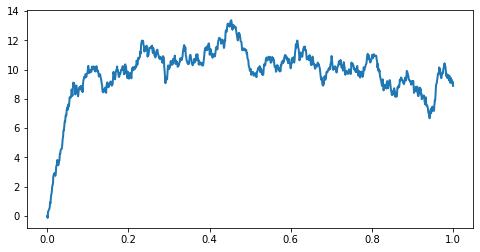

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(t, x, lw=2)

Now, we are going to take a look at the time evolution of the distribution of the process. To do this, we will simulate many independent realizations of the same process in a vectorized way. We define a vector X that will contain all realizations of the process at a given time (that is, we do not keep all realizations at all times in memory). This vector will be overwritten at every time step. We will show the estimated distribution (histograms) at several points in time

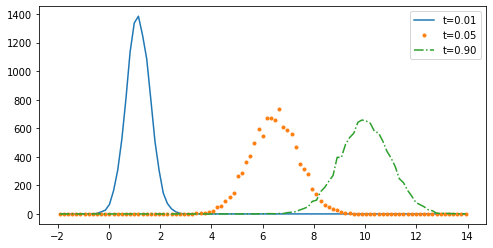

In [18]:
ntrials = 10000
X = np.zeros(ntrials)
# We create bins for the histograms.
bins = np.linspace(-2., 14., 100)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
for i in range(n):
    # We update the process independently for
    # all trials
    X += dt * (-(X - mu) / tau) + \
        sigma_bis * sqrtdt * np.random.randn(ntrials)
    # We display the histogram for a few points in
    # time
    if i in (5, 50, 900):
        hist, _ = np.histogram(X, bins=bins)
        ax.plot((bins[1:] + bins[:-1]) / 2, hist,
                {5: '-', 50: '.', 900: '-.', }[i],
                label=f"t={i * dt:.2f}")
ax.legend()

The distribution of the process tends to a Gaussian distribution with mean μ=10 and standard deviation σ=1. The process would be stationary if the initial distribution was also a Gaussian with the adequate parameters.

In [19]:
sigma = 1.  # Standard deviation.
mu = 10.  # Mean/ Drift Coefficient
tau = .05  # Time constant.
dt = 0.1  # Time step.
T = 1.  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.
x = np.zeros(n)

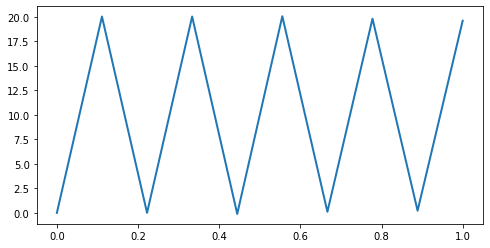

In [20]:
for i in range(n - 1):
    x[i + 1] = x[i] + dt * (-(x[i] - mu) / tau) + sigma_bis * sqrtdt * np.random.randn()
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(t, x, lw=2)